### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
df = pd.read_csv('toyota.csv')

### Dataset Description

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


* model : Model of the car
* year : The year that car was made
* price : Price (Pounds)
* Transmission : Type of gear
* milage : How many miles the car went (1 mile = 1,609344 km)
* fuelType : Fuel type
* tax : tax
* mpg : Miles per gallon (1 galon = 3,78541178 liters)
* engine size : Size of engine (liters)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


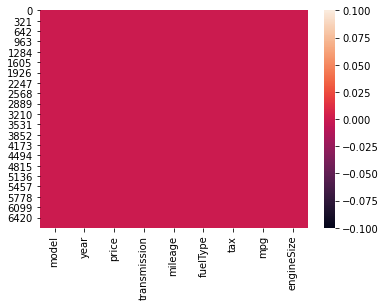

In [5]:
sns.heatmap(df.isnull())

None null values

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


### Data Visualization

In [7]:
sns.set_theme()

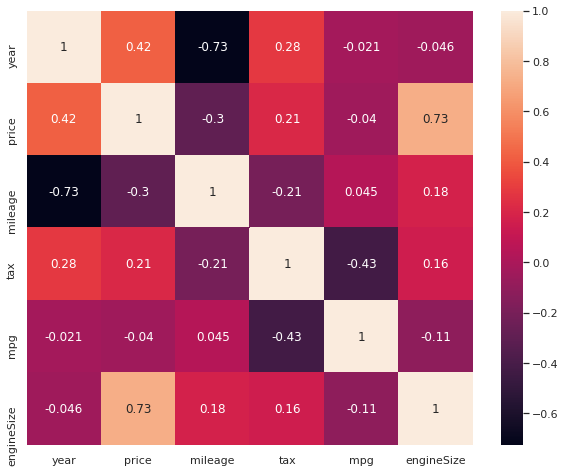

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#### Number of Cars per Model

In [9]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

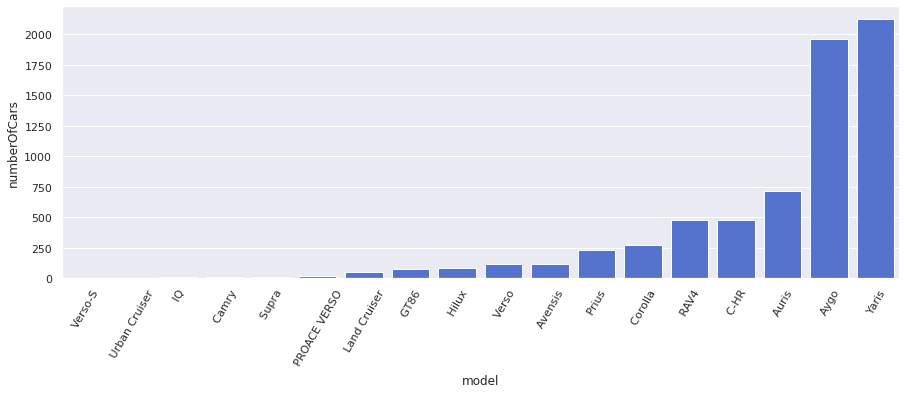

In [10]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

#### Number of Cars per Year

In [11]:
perYear = df.groupby('year').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
perYear = perYear.rename(columns={'tax':'numberOfCars'})

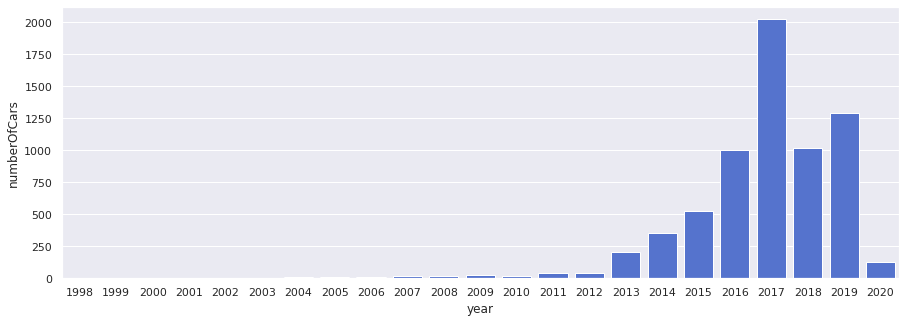

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=perYear['year'], y=perYear['numberOfCars'], color='royalblue')

#### Transmission Type

In [13]:
transmission = df.groupby('transmission').count()[['tax']].sort_values(by='tax').reset_index()
transmission = transmission.rename(columns={'tax':'count'})

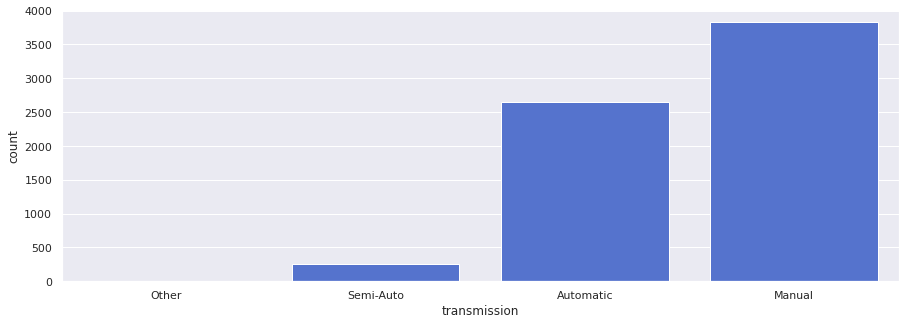

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=transmission['transmission'], y=transmission['count'], color='royalblue')

#### Fuel Type

In [15]:
fuel = df.groupby('fuelType').count()[['tax']].sort_values(by='tax').reset_index()
fuel = fuel.rename(columns={'tax':'count'})

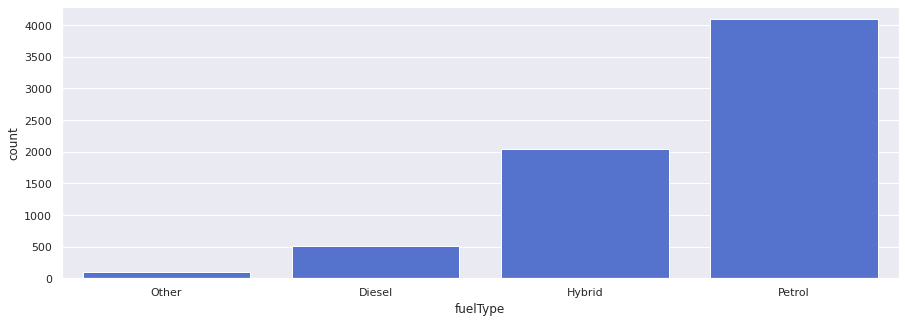

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=fuel['fuelType'], y=fuel['count'], color='royalblue')

#### Engine Size

In [17]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

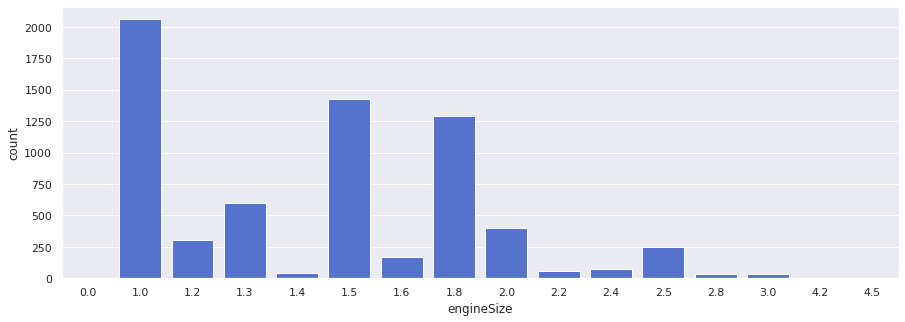

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

#### Mileage Distribuition

/home/victorcabral/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


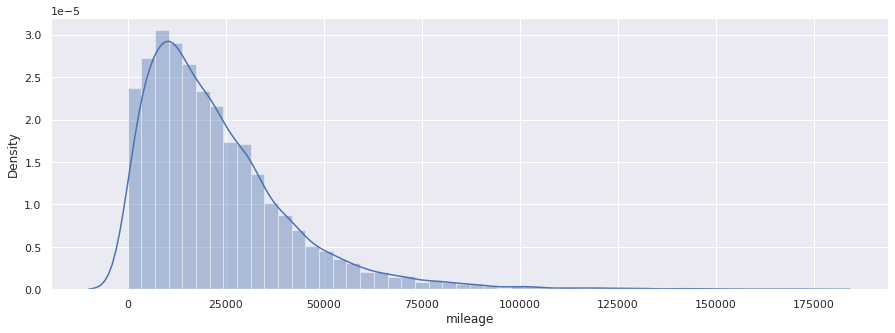

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

#### Price Distribuition

/home/victorcabral/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


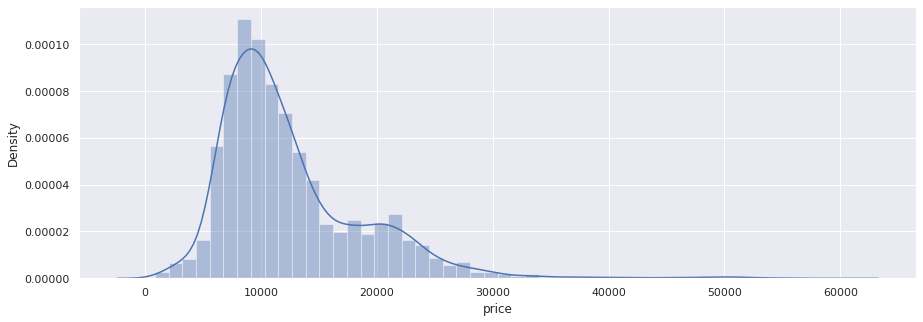

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

### Encoding Categorical Data

Using one-hot encoding to transform categorical data into binary values

#### One-Hot Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
dfEncoded = df

In [22]:
dfEncoded = pd.get_dummies(dfEncoded, columns=["model"], prefix=["Is_a"] )
dfEncoded = pd.get_dummies(dfEncoded, columns=["fuelType"], prefix=['Fuel_is'])
dfEncoded = pd.get_dummies(dfEncoded, columns=["transmission"], prefix=['Transmission_is'])

In [23]:
dfEncoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       6738 non-null   int64  
 1   price                      6738 non-null   int64  
 2   mileage                    6738 non-null   int64  
 3   tax                        6738 non-null   int64  
 4   mpg                        6738 non-null   float64
 5   engineSize                 6738 non-null   float64
 6   Is_a_ Auris                6738 non-null   uint8  
 7   Is_a_ Avensis              6738 non-null   uint8  
 8   Is_a_ Aygo                 6738 non-null   uint8  
 9   Is_a_ C-HR                 6738 non-null   uint8  
 10  Is_a_ Camry                6738 non-null   uint8  
 11  Is_a_ Corolla              6738 non-null   uint8  
 12  Is_a_ GT86                 6738 non-null   uint8  
 13  Is_a_ Hilux                6738 non-null   uint8

### Feature Selection

In [24]:
features = dfEncoded.corr()
targetFeature = abs(features["price"])
relevant_features = targetFeature[targetFeature>0.075]

In [25]:
dfSelected = dfEncoded[relevant_features.index]

In [26]:
dfSelected

,year,price,mileage,tax,engineSize,Is_a_ Aygo,Is_a_ C-HR,Is_a_ Camry,Is_a_ Corolla,Is_a_ GT86,...,Is_a_ PROACE VERSO,Is_a_ Prius,Is_a_ RAV4,Is_a_ Supra,Is_a_ Yaris,Fuel_is_Diesel,Fuel_is_Hybrid,Fuel_is_Petrol,Transmission_is_Automatic,Transmission_is_Manual
0,2016,16000,24089,265,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2017,15995,18615,145,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,2015,13998,27469,265,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,2017,18998,14736,150,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,2017,17498,36284,145,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,2011,5500,30000,20,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6734,2011,4985,36154,125,1.3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6735,2012,4995,46000,125,1.4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6736,2011,3995,60700,125,1.3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Normalizing the Data

In [27]:
data = dfSelected.drop(columns=['price'])
target = dfSelected['price']

In [28]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(data)

In [29]:
scaledData = pd.DataFrame(x, columns=data.columns)

In [30]:
scaledData['price'] = target

### Train and Test Data Split

In [31]:
x = scaledData.drop(columns=['price'])
y = scaledData['price']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

### Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [44]:
score = lr.score(x_test,y_test)
print('R Square Score for Linear Regression : ', score)

R Square Score for Linear Regression :  0.9258269405413438
